In [1]:
import os
CURRENT_FOLDER = os.getcwd()
WORKDIR = os.path.dirname(CURRENT_FOLDER)
WORKDIR = '/home/clarkmaio/workspace/auroraborealis/'
os.environ['PYTHONPATH'] = WORKDIR
os.chdir(WORKDIR)

print(os.getcwd())

/home/clarkmaio/workspace/auroraborealis


In [ ]:
import pandas as pd
import os
from src.data.scraper import DataScraper
import holoviews as hv
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable("vegafusion")


In [37]:
df = DataScraper().load_data()

-------------------  DATA SOURCE -------------------
# LICENSE: CC BY 4.0
# SOURCE: Geomagnetic Observatory Niemegk, GFZ Helmholtz Centre for Geosciences
# PLEASE CITE: Matzka, J., Stolle, C., Yamazaki, Y., Bronkalla, O. and Morschhauser, A., 2021. The geomagnetic Kp index 
# and derived indices of geomagnetic activity. Space Weather, https://doi.org/10.1029/2020SW002641
----------------------------------------------------


In [ ]:
df

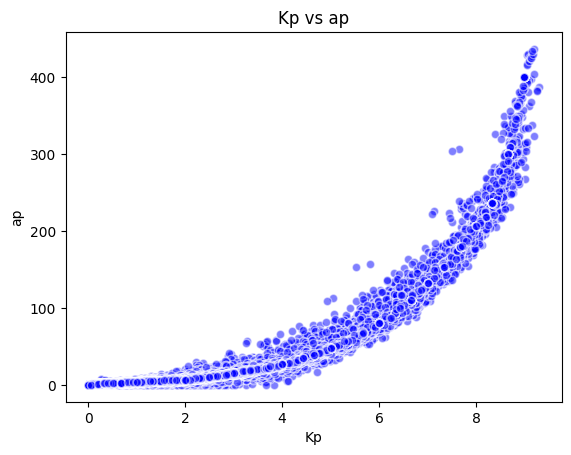

In [38]:
# Scatter Kp vs ap
plt.scatter(df['Kp'], df['ap'], alpha=0.5, edgecolors='w', color='b')
plt.xlabel('Kp')   
plt.ylabel('ap')
plt.title('Kp vs ap')
plt.show()

In [54]:
df['year'] = df['valuedate'].dt.year
df['month'] = df['valuedate'].dt.month

df_agg = df.groupby(['year', 'month']).mean().reset_index()

In [69]:
alt.data_transformers.enable("vegafusion")


hover_selection = alt.selection_point(fields=['year', 'month'], nearest=True, on='mouseover', empty='none')



ts_chart = alt.Chart(df).mark_line().transform_filter(
    hover_selection
).encode(
    x=alt.X('valuedate:T', title=''),
    y=alt.Y('Kp:Q', title='Kp'),
    tooltip=['valuedate', 'Kp', 'ap']
).properties(
    height=400,
    width='container',
)


heatmap_chart = alt.Chart(df_agg).mark_rect(stroke='white').encode(
    x=alt.X('year:O', title=''),
    y=alt.Y('month:O', title=''),
    color=alt.Color('Kp:Q', scale=alt.Scale(scheme='redblue'), legend=None),
    tooltip=['year', 'month', 'Kp']
).add_params(
    hover_selection,
).properties(
    title='Average Kp'
)

chart = ts_chart & heatmap_chart

In [70]:
type(chart)

altair.vegalite.v5.api.VConcatChart